# **Torch Bounding Box On Doodles**

In [1]:
import cv2
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os
import json
import shutil
import torch
import matplotlib.pyplot as plt

In [2]:
# check to see if torch is running on GPU
def check_torch():
    try:
        import torch
        if torch.cuda.is_available():
            print("torch is running on GPU")
        else:
            print("torch is running on CPU")
    except ImportError:
        print("torch is not installed")
        return False
    return True

# checking torch
if check_torch():
    print("torch is installed and running")

torch is running on GPU
torch is installed and running


In [3]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

In [4]:
# training the model
model.train(
    data='/media/parker/Data_Drive/quick-draw-yolo/quickdraw.yaml',
    epochs=25,
    imgsz=640,
    batch=16,
    lr0=0.001,
    lrf=0.01,
    warmup_epochs=3,
    weight_decay=0.0005,
    momentum=0.937,
    optimizer='SGD',
    workers=4,
    device=0,
    mosaic=1.0,
    cache=False
)

Ultralytics 8.3.107 🚀 Python-3.9.21 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 5893MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/media/parker/Data_Drive/quick-draw-yolo/quickdraw.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /media/parker/Data_Drive/quick-draw-yolo/labels/train.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
val: Scanning /media/parker/Data_Drive/quick-draw-yolo/labels/val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.58G      1.704      3.318      1.518        165        640: 100%|██████████| 625/625 [02:59<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.44it/s]


                   all       1000       5560      0.375      0.607      0.487      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.59G     0.8449       1.44      1.076        127        640: 100%|██████████| 625/625 [03:18<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.39it/s]

                   all       1000       5560      0.839      0.853      0.905      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.59G     0.6742      1.013      1.003        140        640: 100%|██████████| 625/625 [03:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.06it/s]

                   all       1000       5560      0.885      0.886      0.947      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.51G     0.5911     0.8582     0.9675        134        640: 100%|██████████| 625/625 [03:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]

                   all       1000       5560      0.917      0.899      0.962      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.47G     0.5548     0.8079     0.9505        140        640:  21%|██        | 131/625 [00:38<02:40,  3.07it/s]

       5/25      3.53G      0.538     0.7927     0.9455        136        640:  69%|██████▊   | 429/625 [02:14<01:01,  3.20it/s]


KeyboardInterrupt: 

In [5]:
# eval on test set
metrics = model.val()

Ultralytics 8.3.107 🚀 Python-3.9.21 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 5893MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /media/parker/Data_Drive/quick-draw-yolo/labels/val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.34it/s]


                   all       1000       5560      0.939      0.943      0.978      0.968
              campfire        407        492      0.962      0.974      0.988      0.978
                 cloud        371        453       0.96      0.965      0.991      0.989
             firetruck        367        444      0.846      0.867      0.931      0.925
            helicopter        358        457      0.939      0.974       0.99      0.977
              hospital        371        461      0.956      0.946      0.983      0.975
              mountain        386        475      0.977      0.976      0.992      0.983
                 skull        355        443      0.982      0.967      0.993      0.991
            skyscraper        384        471      0.963      0.946       0.98      0.949
               tractor        377        462      0.928      0.905      0.975       0.97
         traffic light        386        458      0.952      0.972      0.992      0.967
                  tre

In [ ]:
# loading the trained model
model = YOLO('runs/detect/train3/weights/best.pt')

In [ ]:
# run prediction on test set with stream
results = model.predict(
    source='/media/parker/Data_Drive/quick-draw-yolo/images/test',
    conf=0.3,
    stream=True
)

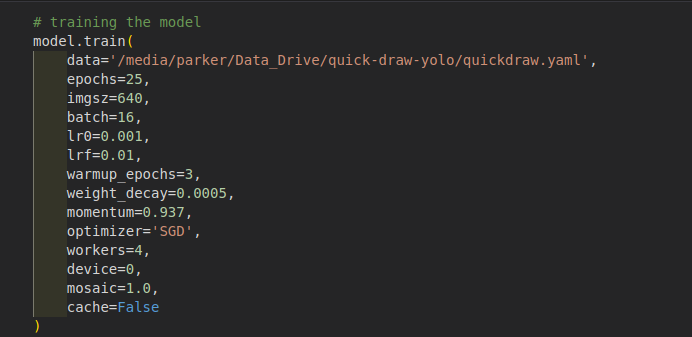